In [2]:
import os
import cv2
import numpy as np
from glob import glob
from os.path import splitext
from sklearn.model_selection import train_test_split
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from glob import glob

In [2]:
"""
根據YALE資料集網址http://vision.ucsd.edu/content/yale-face-database 顯示，總共有165張GIF灰階圖片，

yalefaces檔案夾裡有些問題：
(1)多一張subject01.glasses.gif，先手動移除
(2)subject01.gif其實是subject01.centerlight，先手動重新命名
(3)所有檔案缺少gif副檔名，所以添加檔案gif副檔名，
"""

#添加副檔名
path = 'yalefaces'
files = os.listdir(path)
for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, file+".gif"))

In [3]:
"""
轉成gif檔的問題：
(1)OpenCV無法讀取gif檔，
(2)使用PIL可以成功讀取但在轉成numpy也會有問題，都無法成功轉成tensor去訓練。

解決方法：
所以把gif檔轉成jpg,再把轉完jpg放到新的資料夾裡
"""

#gif檔轉成jpg
giflist = glob( "yalefaces/*.[gG][iI][fF]" )

for gif in giflist:
    im = Image.open(gif)
    jpg = splitext(gif)[0]+".jpg"
    im.save(jpg)
    print(jpg)


yalefaces\subject01.centerlight.jpg
yalefaces\subject01.glasses.jpg
yalefaces\subject01.happy.jpg
yalefaces\subject01.leftlight.jpg
yalefaces\subject01.noglasses.jpg
yalefaces\subject01.normal.jpg
yalefaces\subject01.rightlight.jpg
yalefaces\subject01.sad.jpg
yalefaces\subject01.sleepy.jpg
yalefaces\subject01.surprised.jpg
yalefaces\subject01.wink.jpg
yalefaces\subject02.centerlight.jpg
yalefaces\subject02.glasses.jpg
yalefaces\subject02.happy.jpg
yalefaces\subject02.leftlight.jpg
yalefaces\subject02.noglasses.jpg
yalefaces\subject02.normal.jpg
yalefaces\subject02.rightlight.jpg
yalefaces\subject02.sad.jpg
yalefaces\subject02.sleepy.jpg
yalefaces\subject02.surprised.jpg
yalefaces\subject02.wink.jpg
yalefaces\subject03.centerlight.jpg
yalefaces\subject03.glasses.jpg
yalefaces\subject03.happy.jpg
yalefaces\subject03.leftlight.jpg
yalefaces\subject03.noglasses.jpg
yalefaces\subject03.normal.jpg
yalefaces\subject03.rightlight.jpg
yalefaces\subject03.sad.jpg
yalefaces\subject03.sleepy.jpg
y

In [4]:
x = []
y = []

image_size = 100
dataset_files = glob( "yalefaces2/*.jpg")
for file in dataset_files:
    if "subject01" in file:
        y.append(0)
    elif "subject02" in file:
        y.append(1)
    elif "subject03" in file:
        y.append(2)
    elif "subject04" in file:
        y.append(3)
    elif "subject05" in file:
        y.append(4)
    elif "subject06" in file:
        y.append(5)
    elif "subject07" in file:
        y.append(6)
    elif "subject08" in file:
        y.append(7)
    elif "subject09" in file:
        y.append(8)
    elif "subject10" in file:
        y.append(9)
    elif "subject11" in file:
        y.append(10)
    elif "subject12" in file:
        y.append(11)
    elif "subject13" in file:
        y.append(12)
    elif "subject14" in file:
        y.append(13)
    elif "subject15" in file:
        y.append(14)
    
    img = cv2.imread(file)
    img = cv2.resize(img,(100,100))
    x.append(img)
    


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [6]:
print(f"x_train: {len(x_train)} , y_train: {len(y_train)}")
print(f"x_test: {len(x_test)} , y_test: {len(y_test)}")

x_train: 148 , y_train: 148
x_test: 17 , y_test: 17


In [7]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [8]:
print(f'X_train shape  is {x_train.shape}')
print(f'y_train shape  is {y_train.shape} \n')
print(f'X_test  shape  is {x_test.shape}')
print(f'y_test  shape  is {y_test.shape} \n')

X_train shape  is (148, 100, 100, 3)
y_train shape  is (148,) 

X_test  shape  is (17, 100, 100, 3)
y_test  shape  is (17,) 



In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [10]:
x_train/=255
x_test/=255

In [11]:
#before one-hot
print(y_train[:10])

[ 5  9  9 10  1 13  6 12  7  3]


In [12]:
#one_hot
y_train=to_categorical(y_train, 15)
y_test=to_categorical(y_test, 15)
print(y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
#MLP
model = Sequential()
model.add(Flatten(input_shape=(100, 100, 3)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(15, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 1024)              30721024  
                                                                 
 dense_1 (Dense)             (None, 15)                15375     
                                                                 
Total params: 30,736,399
Trainable params: 30,736,399
Non-trainable params: 0
_________________________________________________________________


In [14]:
history=model.fit(x_train, y_train, batch_size=8, epochs=100, validation_split=0.1)

Epoch 1/100
17/17 [==============================] - 1s 12ms/step - loss: 70.4614 - accuracy: 0.0602 - val_loss: 38.0315 - val_accuracy: 0.2667
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 16.4067 - accuracy: 0.2632 - val_loss: 5.2442 - val_accuracy: 0.3333
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 5.5444 - accuracy: 0.4586 - val_loss: 1.5484 - val_accuracy: 0.6667
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 3.0583 - accuracy: 0.5489 - val_loss: 1.9138 - val_accuracy: 0.7333
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 1.4852 - accuracy: 0.6842 - val_loss: 0.6583 - val_accuracy: 0.8667
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.4763 - accuracy: 0.8722 - val_loss: 0.9082 - val_accuracy: 0.8000
Epoch 7/100
17/17 [==============================] - 0s 7ms/step - loss: 0.3572 - accuracy: 0.9248 - val_loss: 1.5918 - val_accuracy: 0.8000
Epoch 8/1

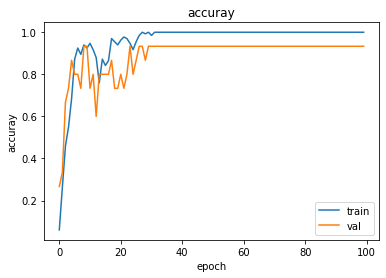

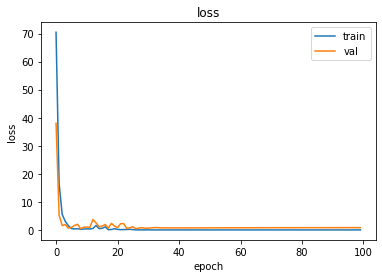

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuray')
plt.ylabel('accuray')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [16]:
score = model.evaluate(x_test, y_test, batch_size=8)
print("score:", score)

3/3 [==============================] - 0s 55ms/step - loss: 0.1296 - accuracy: 0.9412
score: [0.12956219911575317, 0.9411764740943909]
